# Plots for paper

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import json 
import pandas as pd 
try:
    sys.path.remove("../py_src") # Hacky way to add higher directory to python modules path. 
except:
    pass
sys.path.append("../py_src") # Means that I dont have to make src/ a proper python package

In [3]:
from plotting import plot_custom_corner

In [4]:
from system_parameters import SystemParameters
from pulsars import Pulsars

from synthetic_data import SyntheticData
from plotting import plot_statespace,plot_all
from model import LinearModel
from kalman_filter import KalmanFilter
from priors import priors_dict

import random
def single_run(h,measurement_model,seed,perturb_omega): 
    P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed,orthogonal_pulsars=False,Npsr=1) # define the system parameters as a dict. Todo: make this a class
    PTA  = Pulsars(P)               # setup the PTA
    data = SyntheticData(PTA,P) # generate some synthetic data

    #Define the model 
    model = LinearModel(P)

    #Initialise the Kalman filter
    KF = KalmanFilter(model,data.f_measured,PTA)

    # Run the KFwith the correct parameters
    true_parameters = priors_dict(PTA,P)
    if perturb_omega:
        print("Perturbing the omega value from its truth")
        true_parameters["omega_gw"] = true_parameters["omega_gw"]*random.uniform(0.1, 2.0)
        print("New omega = ", true_parameters["omega_gw"])
        
    model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)
    print("Model likelihood is: ", model_likelihood)
    plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,model_state_predictions_x,model_state_predictions_y, 0,savefig=None)

## Example 1: Run ID 1237, $h = 10^{-12}$

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


Model likelihood is:  12464.401661486358
Mean residual: 1.6042878140690272e-14


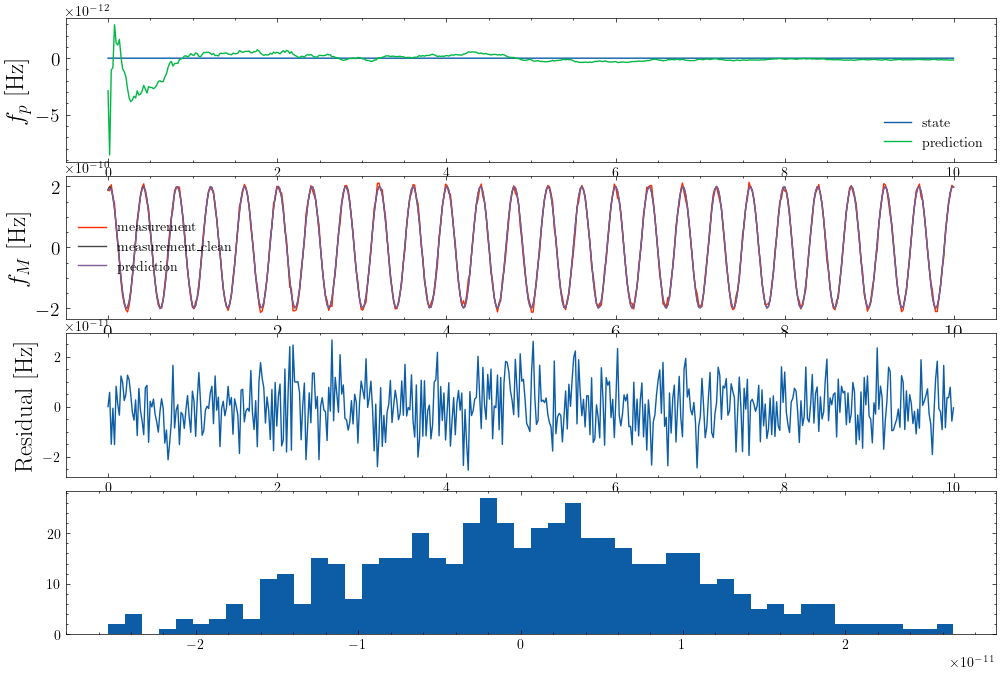

In [13]:
h = 1e-12
measurement_model = "pulsar"
seed = 1237
single_run(h,measurement_model,seed,perturb_omega=False)

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1237
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


Perturbing the omega value from its truth
New omega =  3.127672402411823e-07
Model likelihood is:  -48407.69492406537
Mean residual: 4.9790386335765884e-12


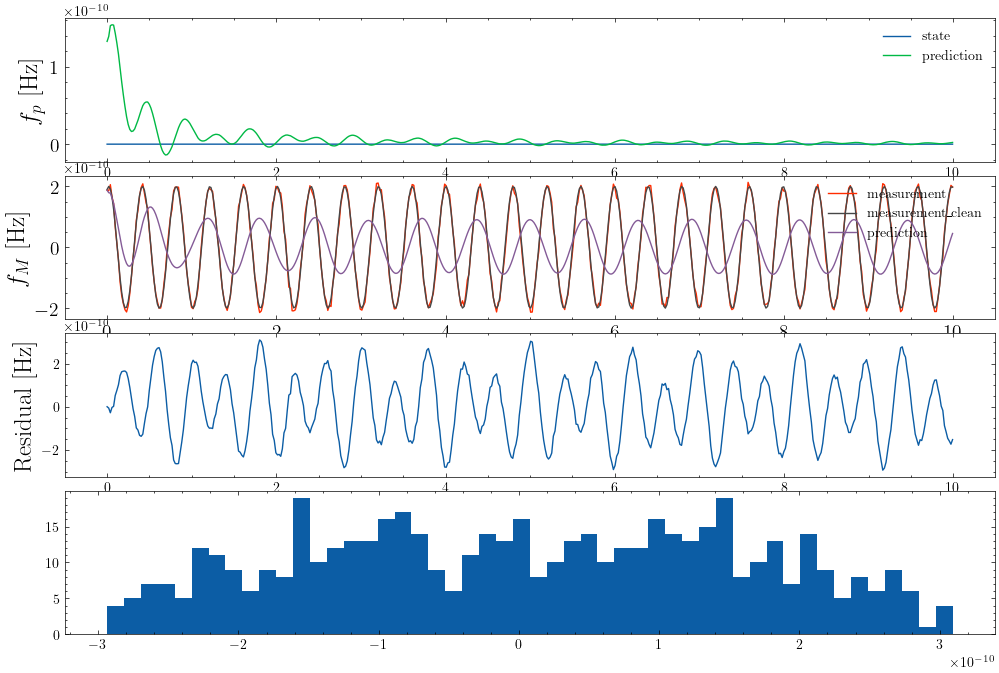

In [14]:
h = 1e-12
measurement_model = "pulsar"
seed = 1237
single_run(h,measurement_model,seed,perturb_omega=True)

In [139]:
seed = 1277

In [143]:
measurement_model = "earth"
P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed,orthogonal_pulsars=False,Npsr=0) # define the system parameters as a dict. Todo: make this a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data

#Define the model 
model = LinearModel(P)

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)
true_parameters = priors_dict(PTA,P)



variable = "delta_gw"
variable_range = np.linspace(0.0,np.pi/2.0,int(1e3))
variable_range = np.arange(0.0,2.0,0.10)

guessed_parameters = true_parameters.copy()
likelihoods        =np.zeros_like(variable_range)
i = 0

    

for v in variable_range:
    guessed_parameters[variable] = v 
    model_likelihood,xres,yres = KF.likelihood(guessed_parameters)    
    
    print(" v= ", v)
    print("Model likelihood is",model_likelihood)
    residuals = np.mean(yres -data.f_measured_clean)
    likelihoods[i] = model_likelihood
    #plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,xres,yres, 0,savefig=None)
    #print (v,model_likelihood)
    i+=1 





INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1277
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


 v=  0.0
Model likelihood is -2322604.6187906004
 v=  0.1
Model likelihood is -1982151.4075464918
 v=  0.2
Model likelihood is -1689266.0293760516
 v=  0.30000000000000004
Model likelihood is -1450476.3625598007
 v=  0.4
Model likelihood is -1262183.1590725482
 v=  0.5
Model likelihood is -1119259.4692899773
 v=  0.6000000000000001
Model likelihood is -1028057.9005031344
 v=  0.7000000000000001
Model likelihood is -989960.7904483996
 v=  0.8
Model likelihood is -808537.7440083215
 v=  0.9
Model likelihood is -674041.0949085574
 v=  1.0
Model likelihood is -646854.6075248161
 v=  1.1
Model likelihood is -762231.3743673891
 v=  1.2000000000000002
Model likelihood is -1051303.3842183196
 v=  1.3
Model likelihood is -1516886.995193408
 v=  1.4000000000000001
Model likelihood is -2160252.6269513676
 v=  1.5
Model likelihood is -2824875.31644491
 v=  1.6
Model likelihood is -3230526.7074378333
 v=  1.7000000000000002
Model likelihood is -3420090.2164697214
 v=  1.8
Model likelihood is -36181

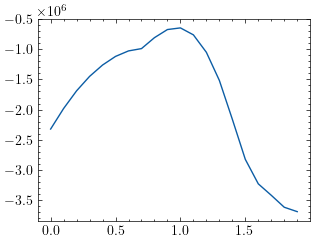

In [144]:
import matplotlib.pyplot as plt 

plt.plot(variable_range,likelihoods)

In [158]:
measurement_model = "pulsar"
P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed,orthogonal_pulsars=False,Npsr=1) # define the system parameters as a dict. Todo: make this a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data

#Define the model 
model = LinearModel(P)

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)
true_parameters = priors_dict(PTA,P)



variable = "delta_gw"
variable_range = np.linspace(0.0,np.pi/2.0,int(1e3))
variable_range = np.arange(0.0,2.0,0.10)

guessed_parameters = true_parameters.copy()
likelihoods        =np.zeros_like(variable_range)
i = 0

    

for v in variable_range:
    guessed_parameters[variable] = v 
    model_likelihood,xres,yres = KF.likelihood(guessed_parameters)    
    residuals = np.mean(np.abs(yres -data.f_measured))
    print(" v= ", v)
    print("Model likelihood is",model_likelihood)
    print("Residuals = ", residuals)
    print(yres.shape)
    print(data.f_measured.shape)
    #plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,xres,yres, 0,savefig=None)
    likelihoods[i] = residuals


    print("-------------------------------")

    i+=1 





INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1277
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


KF edits
 v=  0.0
Model likelihood is -5987.6797076036855
Residuals =  7.537968331807551e-11
(522, 1)
(522, 1)
-------------------------------
KF edits
 v=  0.1
Model likelihood is -6314.181845481204
Residuals =  7.604839299771275e-11
(522, 1)
(522, 1)
-------------------------------
KF edits
 v=  0.2
Model likelihood is 8037.033010242453
Residuals =  3.737400638840378e-11
(522, 1)
(522, 1)
-------------------------------
KF edits
 v=  0.30000000000000004
Model likelihood is 9142.803432174158
Residuals =  3.2533356042628005e-11
(522, 1)
(522, 1)
-------------------------------
KF edits
 v=  0.4
Model likelihood is -8276.682749796886
Residuals =  7.986365571593744e-11
(522, 1)
(522, 1)
-------------------------------
KF edits
 v=  0.5
Model likelihood is -347.79894103318037
Residuals =  6.274842579060768e-11
(522, 1)
(522, 1)
-------------------------------
KF edits
 v=  0.6000000000000001
Model likelihood is -9526.421044541261
Residuals =  8.229150654840458e-11
(522, 1)
(522, 1)
------

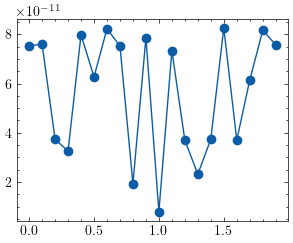

In [157]:
import matplotlib.pyplot as plt 

plt.plot(variable_range,likelihoods)
plt.scatter(variable_range,likelihoods)

In [183]:
seed = 1281

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1281
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


Model likelihood is:  -0.2528898991049775
Mean abs residual: 2.8420505857034235e-10


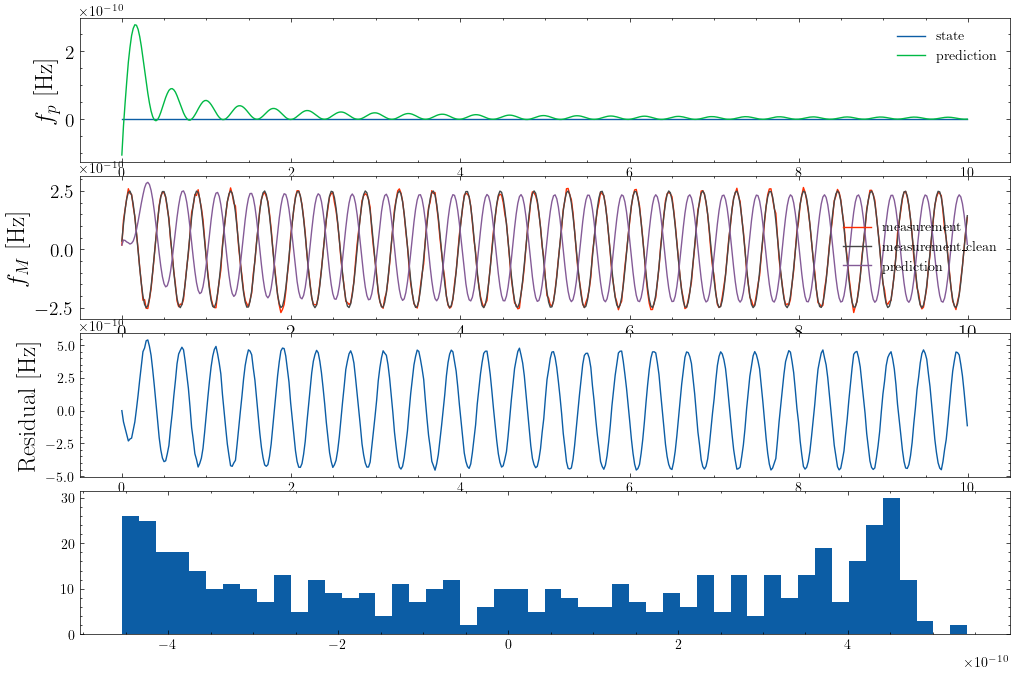

In [184]:
measurement_model = "pulsar"
P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed,orthogonal_pulsars=False,Npsr=1) # define the system parameters as a dict. Todo: make this a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data

#Define the model 
model = LinearModel(P)

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)
true_parameters = priors_dict(PTA,P)
true_parameters["delta_gw"] = 0.80
model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)
print("Model likelihood is: ", model_likelihood/1e6)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,model_state_predictions_x,model_state_predictions_y, 0,savefig=None)
residuals = np.mean(np.abs(yres -data.f_measured))

In [185]:
model_state_predictions_y_e08 = model_state_predictions_y

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1281
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation


Model likelihood is:  -0.5778527254252883
Mean abs residual: 4.256920229425094e-10


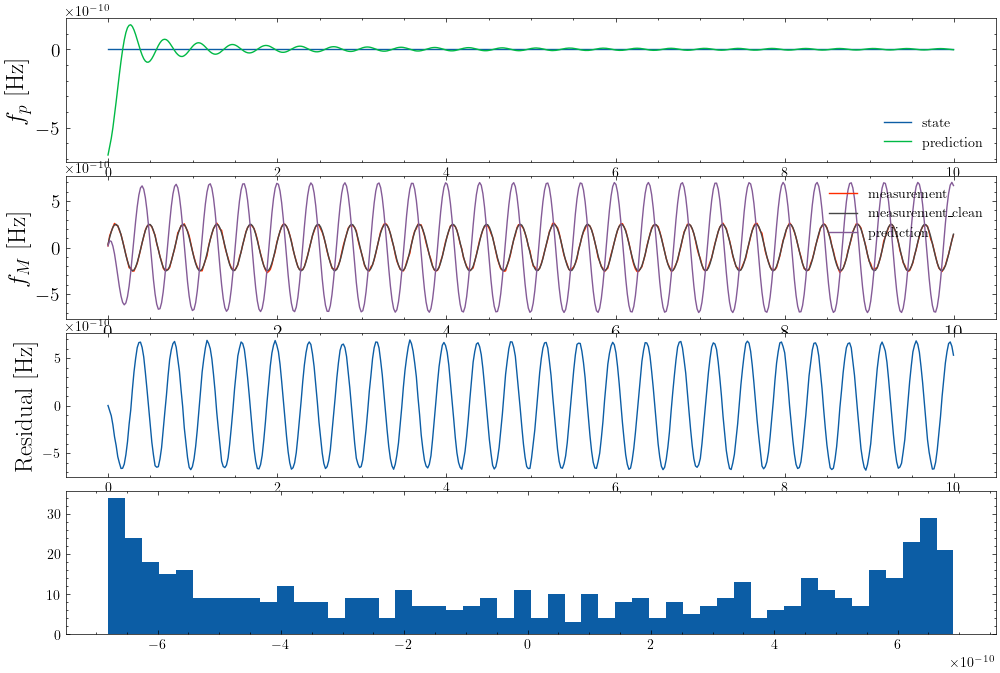

In [186]:
measurement_model = "pulsar"
P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed,orthogonal_pulsars=False,Npsr=1) # define the system parameters as a dict. Todo: make this a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data

#Define the model 
model = LinearModel(P)

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)
true_parameters = priors_dict(PTA,P)
true_parameters["delta_gw"] = 0.90
model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)
print("Model likelihood is: ", model_likelihood/1e6)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,model_state_predictions_x,model_state_predictions_y, 0,savefig=None)

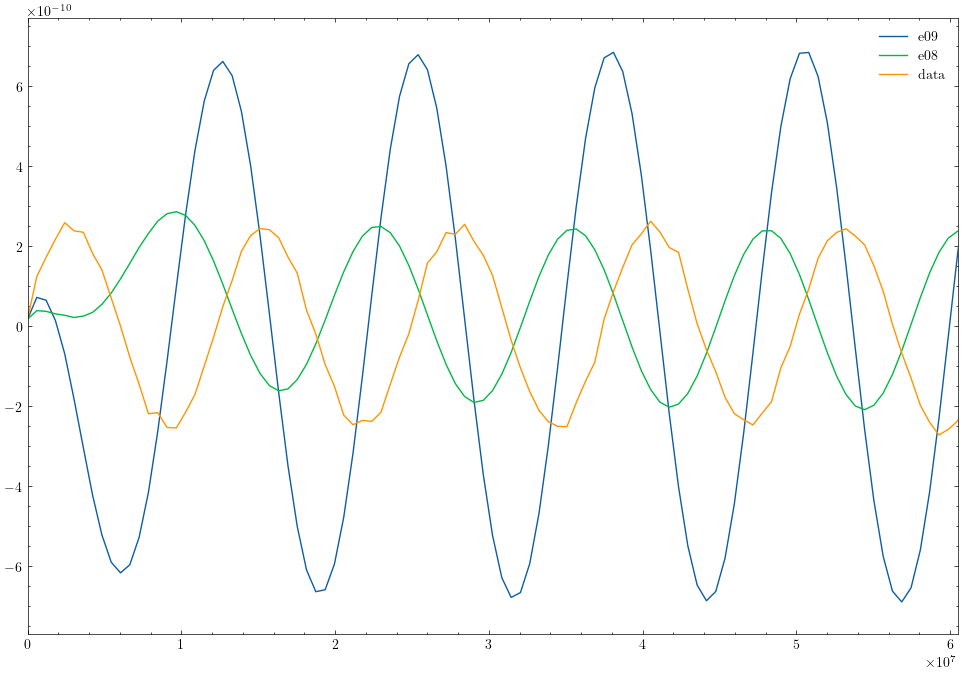

In [187]:
import matplotlib.pyplot as plt 



plt.figure(figsize=(12,8))
model_state_predictions_y
psr_index = 0

plt.plot(PTA.t,model_state_predictions_y[:,psr_index],label="e09")
plt.plot(PTA.t,model_state_predictions_y_e08[:,psr_index],label = "e08")
plt.plot(PTA.t,data.f_measured[:,psr_index],label = "data")
plt.xlim(0,PTA.t[100])
plt.legend()


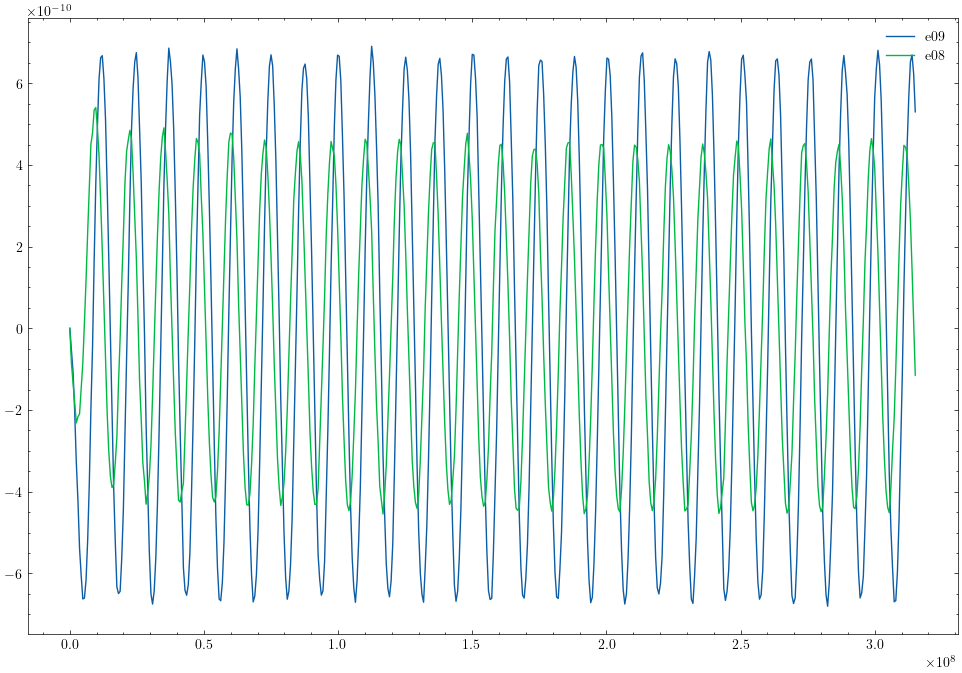

In [188]:
plt.figure(figsize=(12,8))
model_state_predictions_y
psr_index = 0

plt.plot(PTA.t,model_state_predictions_y[:,psr_index]-data.f_measured[:,psr_index],label="e09")
plt.plot(PTA.t,model_state_predictions_y_e08[:,psr_index]-data.f_measured[:,psr_index],label = "e08")


plt.legend()

---

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1281
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


Model likelihood is:  -0.13736823813116772
Mean abs residual: 2.1459010538992532e-10


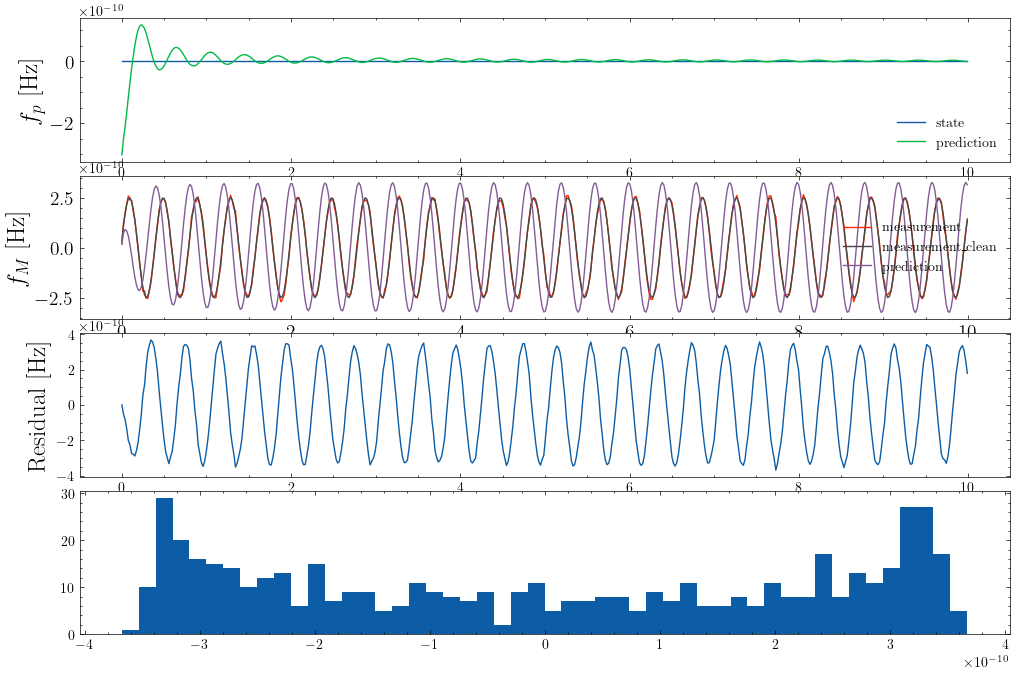

In [189]:
measurement_model = "earth"
P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed,orthogonal_pulsars=False,Npsr=1) # define the system parameters as a dict. Todo: make this a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data

#Define the model 
model = LinearModel(P)

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)
true_parameters = priors_dict(PTA,P)
true_parameters["delta_gw"] = 0.80
model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)
print("Model likelihood is: ", model_likelihood/1e6)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,model_state_predictions_x,model_state_predictions_y, 0,savefig=None)
residuals = np.mean(np.abs(yres -data.f_measured))

In [190]:
model_state_predictions_y_e08 = model_state_predictions_y

INFO:root:Welcome to the Kalman Filter Nested Sampler for PTA GW systems
INFO:root:Random seed is 1281
INFO:root:You are assigning the σp terms randomly
INFO:root:You are including the PSR terms in your synthetic data generation
INFO:root:You are using the Earth terms measurement model


Model likelihood is:  -0.15328874199421588
Mean abs residual: 2.2569404503689164e-10


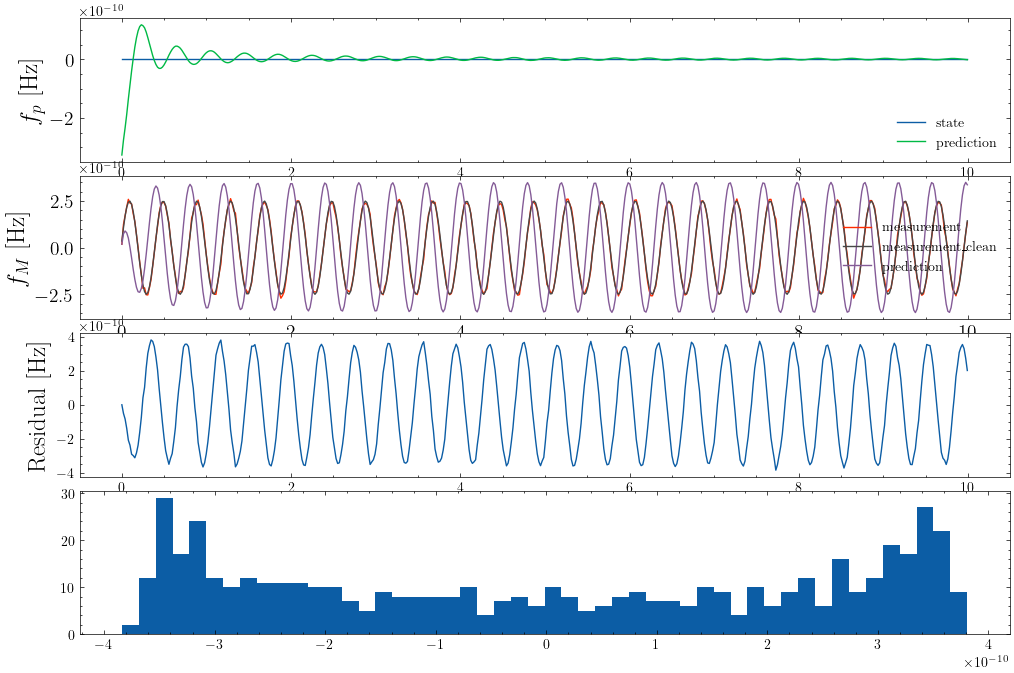

In [191]:
measurement_model = "earth"
P   = SystemParameters(h=h,σp=None,σm=1e-11,use_psr_terms_in_data=True,measurement_model=measurement_model,seed=seed,orthogonal_pulsars=False,Npsr=1) # define the system parameters as a dict. Todo: make this a class
PTA  = Pulsars(P)               # setup the PTA
data = SyntheticData(PTA,P) # generate some synthetic data

#Define the model 
model = LinearModel(P)

#Initialise the Kalman filter
KF = KalmanFilter(model,data.f_measured,PTA)
true_parameters = priors_dict(PTA,P)
true_parameters["delta_gw"] = 0.90
model_likelihood, model_state_predictions_x,model_state_predictions_y = KF.likelihood(true_parameters)
print("Model likelihood is: ", model_likelihood/1e6)
plot_all(PTA.t, data.intrinsic_frequency, data.f_measured,data.f_measured_clean,model_state_predictions_x,model_state_predictions_y, 0,savefig=None)
residuals = np.mean(np.abs(yres -data.f_measured))

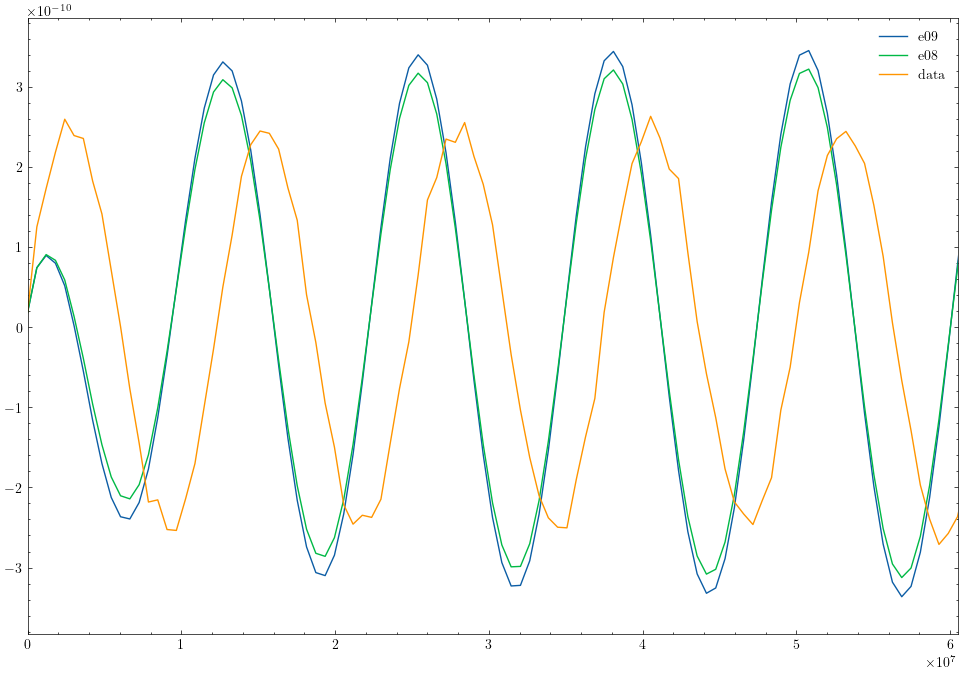

In [192]:
import matplotlib.pyplot as plt 



plt.figure(figsize=(12,8))
model_state_predictions_y
psr_index = 0

plt.plot(PTA.t,model_state_predictions_y[:,psr_index],label="e09")
plt.plot(PTA.t,model_state_predictions_y_e08[:,psr_index],label = "e08")
plt.plot(PTA.t,data.f_measured[:,psr_index],label = "data")
plt.xlim(0,PTA.t[100])
plt.legend()
